Notebook dives into variety of metrics, measurement and comparison functions available in evaluate library 

### Guidelines for choosing the metrics 

1. Generic metrics : Applied to variety of Datasets, like Accuracy and precision

2. Task specific metrics : BLEU for translation / ROUGE for generation / seqeval for NER

3. Dataset specific metrics : Each GLUE task has its own metric 

In [1]:
# Generic Metric Accuracy

# accuracy: Checks the actual labels, and the predicted values to find how many are equal. The number of correct values are divided by the total value. 

from evaluate import load
accuracy = load('accuracy')
accuracy.compute(predictions=[0, 1], references=[0, 1])

{'accuracy': 1.0}

In [2]:
# Generic Metric Precision
# Precision is defined the proportion of positive class predictions that were actually correct. 
# if 100 were predicted positive, and 70 were correct then precision is 70
precision = load('precision')
precision.compute(predictions=[0, 1, 1, 0, 1], references=[1, 0, 1, 1 ,1])

{'precision': 0.6666666666666666}

In [4]:
# Recall is defined as the actual positive class samples that were identified by the model
recall = load('recall')
recall.compute(predictions=[0, 1, 0, 1, 1], references=[1, 0, 0, 1, 1])

{'recall': 0.6666666666666666}

### Brier Score

Brier score is a type of evaluation metric for classification tasks, where you predict outcomes such as win/lose, spam/ham, click/no-click etc. BrierScore = 1/N * sum( (p_i - o_i)^2 )

In [19]:
import numpy as np

brier_score = load("brier_score")

predictions = np.array([0, 0, 1, 1])
references = np.array([1, 0, 1, 1])

results = brier_score.compute(predictions=predictions,
                              references=references)
results

{'brier_score': 0.25}

https://www.v7labs.com/blog/precision-vs-recall-guide

True Positives : No of positive classes correctly classified by the model

True Negatives : No of negative classes correctly classified by the model

False Positives : Negative classes wrongly classified as Positive classes
(Cancer free patient should not be classified as patient with cancer)

False Negatives : Positive classes wrongly classified as Negative classes
(in case of covid we want to reduce the false negatives, as the spread needs to be curtailed)

The three main global scores are micro-averaged, macro-averaged, and weighted-averaged precision and recall.

f1_score = (2 X precision X recall) / (precision + recall)

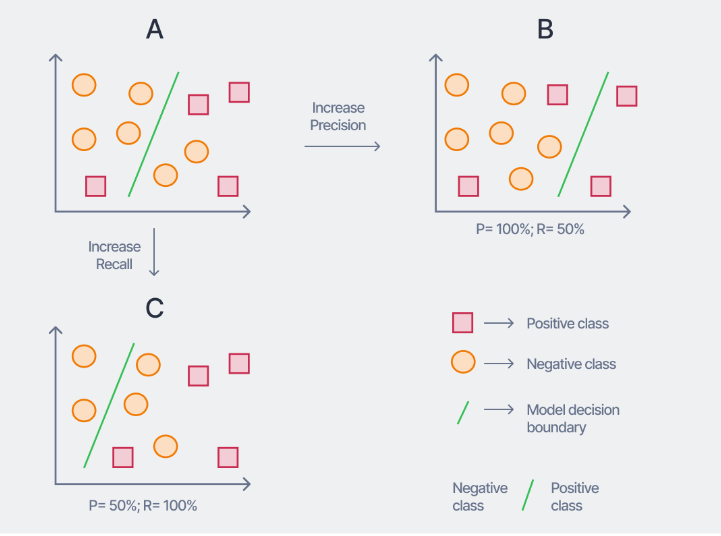

In [7]:
f1 = load('f1')
f1.compute(predictions=[0, 1, 0, 1, 1, 1], references=[0, 1, 1, 0, 1, 1])

{'f1': 0.75}

### Locating Task Specific metric

### How to locate the task specific metrics

- Looking at the task pages (https://huggingface.co/tasks)

- Checking paper with code page(https://paperswithcode.com/) contains all the new models, their code along with the evaluation process used

- Looking at the metric cards. (https://github.com/huggingface/evaluate/tree/main/metrics)
Individual metrics, and their code is present in above repo. The cards provide the usage and explanation


#### Locating the Dataset Specific metrics, use the load functions in evaluate
#### Squad

In [10]:
from evaluate import load
squad_metric = load("squad")
predictions = [{'prediction_text': '1976',
                'id': '56e10a3be3433e1400422b22'}]
references = [{'answers': {'answer_start': [97],
                        'text': ['1976']},
                        'id': '56e10a3be3433e1400422b22'}]
results = squad_metric.compute(predictions=predictions, references=references)

In [11]:
results

{'exact_match': 100.0, 'f1': 100.0}

### bert-score

In [ ]:
# BertScore: BERTScore is an automatic evaluation metric for text generation that computes a similarity score for each token in the candidate sentence with each token in the reference sentence. 
# It leverages the pre-trained contextual embeddings from BERT models
# !pip install bert_score
bertscore = load('bertscore')
prediction = ['Hello there', 'general noon']
reference = ['Hello there', 'general noon']
bertscore.compute(predictions=prediction, 
                  references=reference, lang='en')

# the generation model will be downloaded, and used for cross checking the output

In [ ]:
# using a specific model, that is already present
results = bertscore.compute(predictions=predictions,
                            references=references,
                            model_type="distilbert-base-uncased")

### Bleu

BLEU (Bilingual Evaluation Understudy) is an algorithm for evaluating the quality of text which has been machine-translated from one natural language to another. Quality is considered to be the correspondence between a machine's output and that of a human: 

In [15]:
predictions = ["hello there general kenobi", "foo bar foobar"]
references = [
    ["hello there general kenobi", "hello there !"],
    ["foo bar foobar"]
]
bleu = load("bleu")
results = bleu.compute(predictions=predictions, references=references)
print(results)

{'bleu': 1.0, 'precisions': [1.0, 1.0, 1.0, 1.0], 'brevity_penalty': 1.0, 'length_ratio': 1.1666666666666667, 'translation_length': 7, 'reference_length': 6}


### BleuRT

BLEURT is a learned evaluation metric for Natural Language Generation. It is built using multiple phases of transfer learning starting from a pretrained BERT model 

In [ ]:
predictions = ["hello there", "general kenobi"]
references = ["hello there", "general kenobi"]

bleurt = load("bleurt", module_type="metric")

results = bleurt.compute(predictions=predictions,
                         references=references)
# downloads the BLEURT-tiny model